<a href="https://colab.research.google.com/github/yokishin1005/Deepgram_spch_to_text/blob/main/tech0day_vol2_20240405_deepgram%26openai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 本日は、ChatGPTとTavilyというAI検索エンジンを活用したアプリを作ります！「Techを使う」側になる体験をお届けします！

## ①ChatGPTのAPIに触れる
## ②TavilyというAI検索エンジンのAPIに触れる
## ③①と②を掛け合わせて使ってみる

#①まずはChatGPTの裏側に触れてみましょう

## APIとは

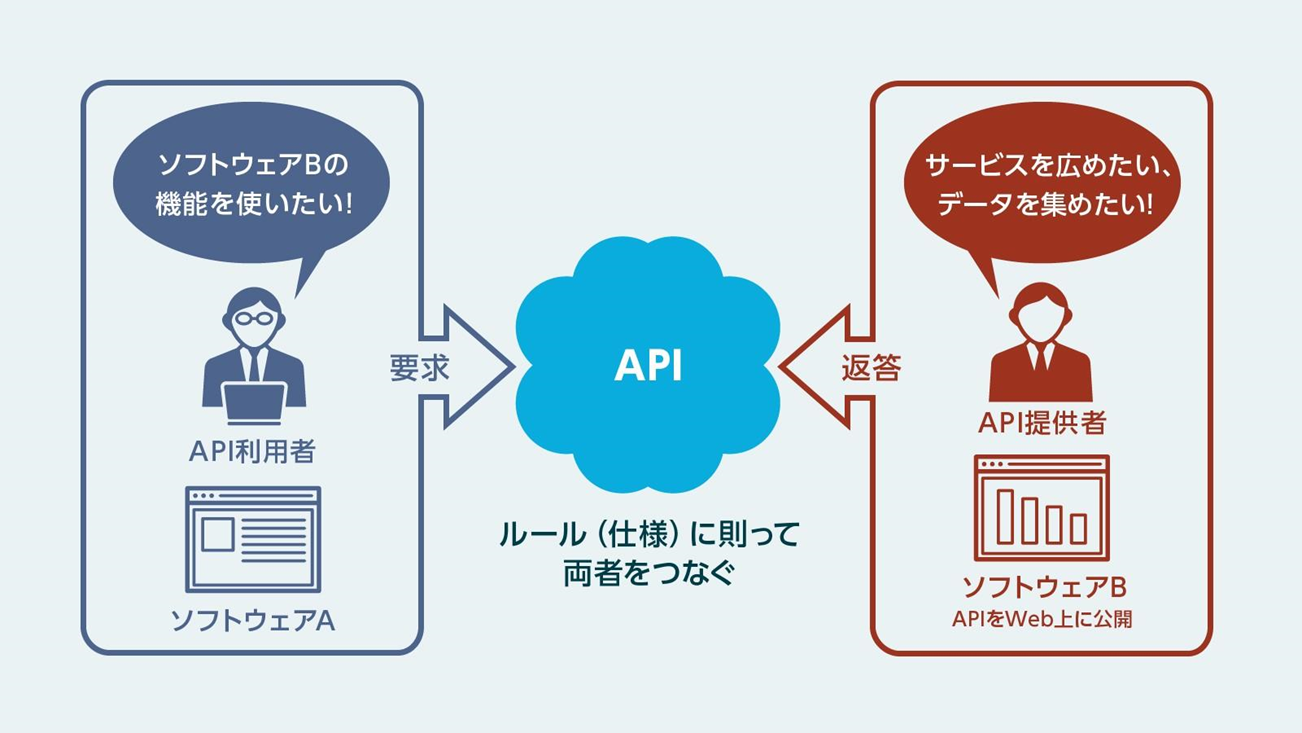

In [ ]:
!pip install --upgrade openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.7/320.7 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.3 MB/s eta 0:00:00


In [ ]:
#ライブラリの実装
from openai import AzureOpenAI

GPT_MODEL = "gpt-35-turbo" #gpt-35-turboでも可
ENDPOINT = "https://tech0-gpt-event-westus.openai.azure.com/"
API_KEY = "7f8cf8152081499396b0c51111d81e63"
API_VERSION = "2024-02-15-preview"

# Openaiの設定
client = AzureOpenAI(
  azure_endpoint = ENDPOINT,
  api_key=API_KEY,          #パスワード（API key）の入力
  api_version=API_VERSION
)

In [ ]:
response  = client.chat.completions.create(
  model= GPT_MODEL,
  messages = [
        {"role": "system", "content": "APIとはなんですか？IT初学者にもわかりやすいように説明ください。"}
    ],
)

output = response.choices[0].message.content

#結果の出力
print(output)

API（Application Programming Interface）は、ソフトウェアアプリケーション同士が情報をやり取りするためのインターフェースのことです。APIは、異なるソフトウェアやプログラミング言語の間でコミュニケーションを可能にするための規則や手順を定義しています。

たとえば、ウェブサービスのAPIを利用すると、そのサービスが提供する機能やデータにアクセスすることができます。これにより、別のソフトウェアやアプリケーションがそのサービスを活用することが可能となります。

APIは、デベロッパーが他のアプリケーションやサービスと連携できるようにするための重要な要素であり、ソフトウェアの開発や統合において広く利用されています。


# ②TavilyというAI検索エンジンのAPIに触れる

### [TavilyというAI機能を強化した検索エンジンを使います](https://tavily.com/)
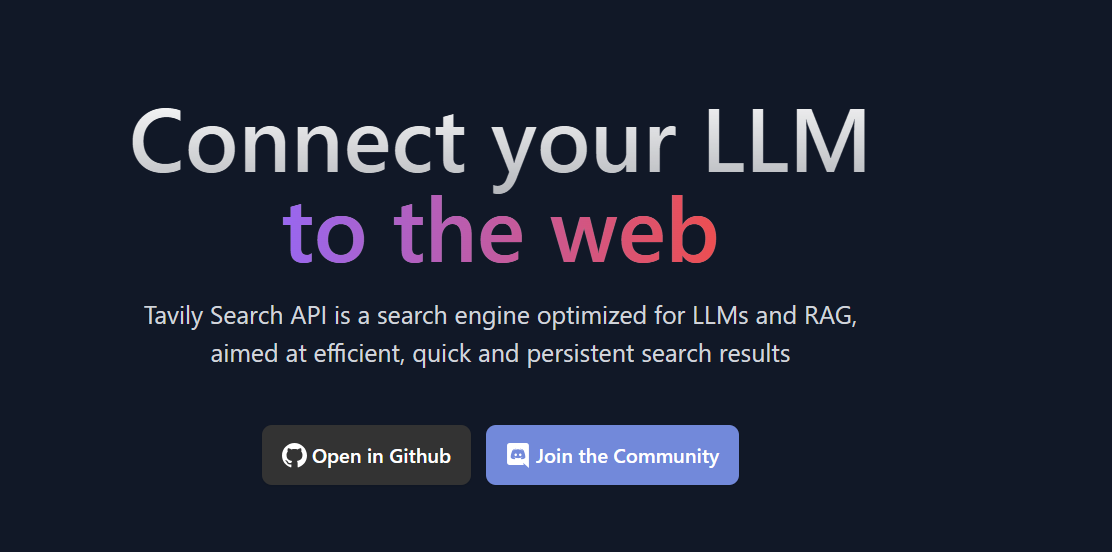

In [ ]:
# パッケージのインストール
!pip install tavily-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 7.5 MB/s eta 0:00:00


In [ ]:
from tavily import TavilyClient
tavily = TavilyClient(api_key="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")


In [ ]:
# For basic search:
response = tavily.search(query="大谷翔平さんは最近大活躍していますか？")
response

# Tavilyの検索エンジンと、ChatGPTの生成機能を合わせて使ってみましょう

## コンサルタントのように回答する検索アプリ

In [ ]:
# 検索
query = "大谷翔平さんは大活躍していますか？"
response = tavily.search(query)

prompt = f"""
以下の検索結果を参考に、質問に答えてください。
回答いただく際には、以下のルールを守ってください。
①質問者の意図の確認：どのような意図であるかを言語化してください。
②言語化した内容をもとに、質問の内容に対して論理的に回答してください。
③検索結果から、質問に対する回答に相応しい引用元を3つ提示してください

## 検索結果
{response}

## 質問
{query}
"""
response = client.chat.completions.create(
    model= "gpt-4",
    messages=[
        {"role": "system", "content": prompt}
      ],
    )

output = response.choices[0].message.content
print(output)

### 質問者の意図の確認
質問者は、現在の大谷翔平さんの活躍状況、特に野球の分野で彼が成し遂げている実績や貢献度について知りたいと考えていると推察されます。

### 論理的な回答
はい、大谷翔平さんは大活躍しています。検索結果によると、彼は投手と打者の二刀流でMLB（メジャーリーグベースボール）を舞台に活躍していることが確認できます。具体的には、以下のような成果があります。

1. 彼はMVP（最優秀選手賞）を含む複数の賞を受賞しており、特にNHKの記事によると、MVPを満票で2回受賞しています。
   - 出典: NHK - "エンジェルス 大谷翔平 満票で2回目のmvp受賞 大リーグ史上初" (https://www3.nhk.or.jp/news/html/20231117/k10014260761000.html)

2. 彼は名門ドジャースの主力打者としても活躍を披露しており、4月22日現在で打率.368でナ・リーグ首位に立っています。
   - 出典: Number - "《独占インタビュー》ドジャース大谷翔平29歳に問う"10年後"" (https://number.bunshun.jp/articles/-/861415)

3. 更に、大谷翔平さんは前年（情報の時点では2023年）44本塁打でアジア人初となる本塁打王に輝き、MLB史上初となる投打で規定に到達したほか、2度目のリーグMVPを受賞しています。そしてドジャースと10年総額7億ドルという記録的な契約を結んでいます。
   - 出典: スポーツナビ - "大谷 翔平 - ロサンゼルス・ドジャース - Mlb" (https://baseball.yahoo.co.jp/mlb/player/2100825/top)

これらの実績は、大谷翔平さんが非常に高いレベルで活躍していることを示しています。
